In [1]:
import cv2

acquire from webcom

In [2]:
''' use this for to capture image from our device
cap = cv2.VideoCapture(0) 
ret, frame = cap.read(4)  #for capture
if ret:
    cv2.imwrite('acquired_image.jpg', frame)  # Save for next steps
cap.release()'''

" use this for to capture image from our device\ncap = cv2.VideoCapture(0) \nret, frame = cap.read(4)  #for capture\nif ret:\n    cv2.imwrite('acquired_image.jpg', frame)  # Save for next steps\ncap.release()"

after the caturing image we will doo reprecessing like removing noise 

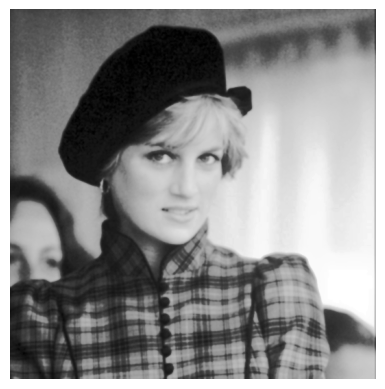

True

In [3]:
import matplotlib.pyplot as plt
img = cv2.imread('acquired_image.png')



gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
equalized = cv2.equalizeHist(blur)

plt.imshow(equalized, cmap='gray')
plt.axis('off')
plt.show()

cv2.imwrite('preprocessed.jpg', equalized)


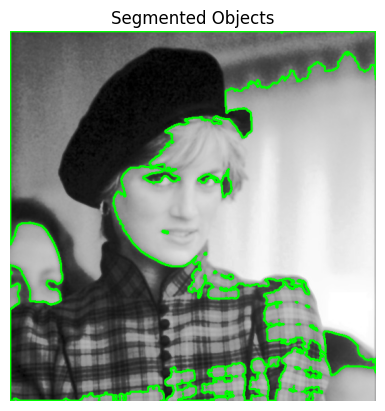

True

In [4]:
### Segmentation AND ROI
img = cv2.imread('preprocessed.jpg', 0)
_, thresh = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY+cv2.THRESH_BINARY_INV)  # Binary segmentation
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output, contours, -1, (0,255,0), 2)  # Draw segmented regions

# Show using matplotlib (convert BGR → RGB)
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

plt.imshow(output_rgb)
plt.title("Segmented Objects")
plt.axis('off')
plt.show()

cv2.imwrite('segmented.jpg', output)

The ORB algorithm to detect important feature points in a grayscale image, visualize them for analysis, and prepare descriptors for further image matching or recognition tasks.

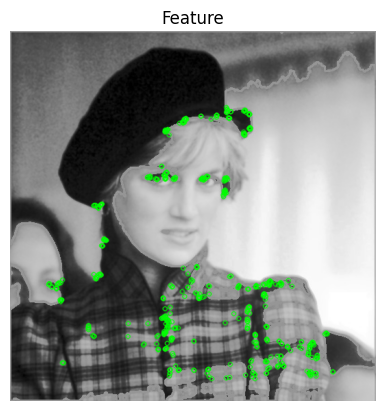

True

In [5]:
img = cv2.imread('segmented.jpg', 0)
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(img, None)  # Extract features
output = cv2.drawKeypoints(img, keypoints, None, color=(0,255,0))

plt.imshow(output)
plt.title("Feature")
plt.axis('off')
plt.show()

cv2.imwrite('segmented.jpg', output)

compares two images by matching their ORB features and visually shows how similar regions correspond.

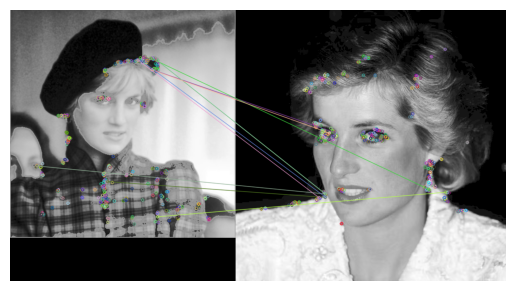

In [6]:
import numpy as np
img1 = cv2.imread('segmented.jpg', 0)
img2 = cv2.imread('preprocessed.png', 0)  # Assume a second image
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
#Create Brute Force Matcher
#Used for binary descriptors (ORB, BRIEF)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)  # Good matches
output = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None)

plt.imshow(output)
plt.axis('off')
plt.show()



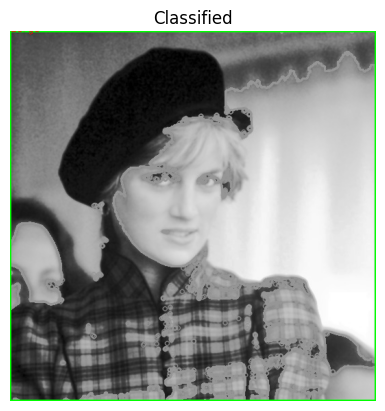

In [7]:
img = cv2.imread('segmented.jpg', 0)
contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for cnt in contours:
    area = cv2.contourArea(cnt)
    label = "Large" if area > 1000 else "Small"  # Simple classification
    cv2.drawContours(output, [cnt], 0, (0,255,0), 2)
    cv2.putText(output, label, (cnt[0][0][0], cnt[0][0][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)

plt.imshow(output)
plt.title("Classified")
plt.axis('off')
plt.show()

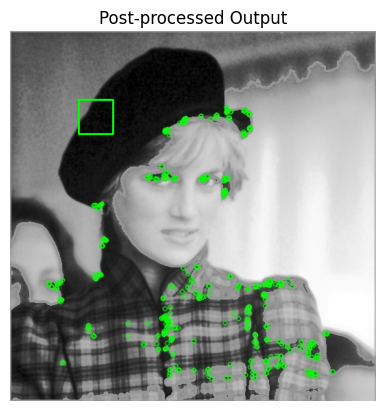

In [8]:
detections = np.array([[100,100,50,50,0.9], [105,105,50,50,0.8]])  # Example
## NMS removes duplicate/overlapping boxes and keeps only the best ones
indices = cv2.dnn.NMSBoxes(detections[:,:4].tolist(), detections[:,4].tolist(), 0.5, 0.4)
img = cv2.imread('segmented.jpg')
for i in indices:
    x,y,w,h = detections[i,:4].astype(int)
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)


plt.imshow(img)
plt.title("Post-processed Output")
plt.axis('off')
plt.show()
